In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn
import sklearn

In [2]:
import numpy as np
import math

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.theta = None

    def rmse(self, y_pred=None, y=None):
        return math.sqrt(self.mse(y_pred, y))

    def mse(self, y_pred=None, y=None):
        y = np.array(y, dtype=float).reshape(-1)
        return np.mean((y_pred - y) ** 2)

    def mae(self, y_pred=None, y=None):
        y = np.array(y, dtype=float).reshape(-1)
        return np.mean(np.abs(y - y_pred))

    def r2_score(self, y_pred=None, y_true=None):
        y_true = np.array(y_true, dtype=float).reshape(-1)
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot

    def fit(self, x, y, x_t=None, y_t=None, epochs=10000, coef=0.001):
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        self.w = np.ones(x.shape[1]) * 0.001
        self.b = 0.001
        n = x.shape[0]

        loss = []
        val_loss = []

        # Initial RMSE
        y_pred = np.dot(x, self.w) + self.b
        loss.append(float(self.rmse(y_pred, y)))
        if x_t is not None and y_t is not None:
            val_loss.append(float(self.rmse(np.dot(x_t, self.w) + self.b, y_t)))

        print(f"Before Gradient Descent: RMSE={loss[-1]:.5f}")

        # Gradient Descent
        for i in range(epochs):
            y_pred = np.dot(x, self.w) + self.b
            dw = (1 / n) * np.dot(x.T, (y_pred - y))
            db = (1 / n) * np.sum(y_pred - y)

            self.w -= coef * dw
            self.b -= coef * db

            y_pred = np.dot(x, self.w) + self.b
            loss.append(float(self.rmse(y_pred, y)))

            if x_t is not None and y_t is not None:
                y_val_pred = np.dot(x_t, self.w) + self.b
                val_loss.append(float(self.rmse(y_val_pred, y_t)))

            if i % 1000 == 0:
                print(f"Epoch {i} | RMSE: {loss[-1]:.5f}")

        print(f"After Gradient Descent: RMSE={loss[-1]:.5f}")
        return loss, val_loss

    def fit_normal(self, X, y, use_pinv=True):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1, 1)
        if use_pinv:
            self.theta = (np.linalg.pinv(X) @ y).ravel()
        else:
            self.theta = np.linalg.solve(X.T @ X, X.T @ y).ravel()
        return self.theta

    def predict_gd(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.w) + self.b

    def predict_normal(self, X):
        if self.theta is None:
            raise ValueError("Model parameters not initialized. Call fit_normal() before predict_normal().")
        X = np.array(X, dtype=float)
        return (X @ self.theta.reshape(-1, 1)).ravel()


In [3]:
df=pd.read_csv('california_housing_train.csv')

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [6]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

scaler.fit(x)

x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [7]:
x_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.102902,-0.015831,-0.736842,2.063046,2.417082,-0.163265,0.194896,-0.932008
1,1.060686,0.039578,-0.526316,3.269498,4.176512,-0.040816,0.167053,-0.783686
2,1.036939,-0.147757,-0.631579,-0.832914,-0.740214,-0.895811,-0.903326,-0.860528
3,1.034301,-0.160950,-0.789474,-0.370579,-0.276157,-0.700322,-0.566125,-0.160364
4,1.034301,-0.179420,-0.473684,-0.398402,-0.307473,-0.583244,-0.454756,-0.735973
...,...,...,...,...,...,...,...,...
16995,-1.522427,1.670185,1.210526,0.053278,-0.113879,-0.279270,-0.123743,-0.539619
16996,-1.525066,1.699208,0.368421,0.131419,0.267616,0.029001,0.173241,-0.466549
16997,-1.532982,2.002639,-0.631579,0.325588,0.276157,0.082707,0.145398,-0.233252
16998,-1.532982,1.992084,-0.526316,0.322628,0.335943,0.140709,0.213457,-0.711116


In [8]:
df_test=pd.read_csv('california_housing_test.csv')
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

x_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

## Gradient Descent

In [10]:
rg=LinearRegression()
loss,val_loss=rg.fit(x_scaled,y,x_test,y_test)

Before Gradient Descent: RMSE=237539.70063
Epoch 0 | RMSE: 237201.02137
Epoch 1000 | RMSE: 111475.60382
Epoch 2000 | RMSE: 88278.30739
Epoch 3000 | RMSE: 81519.67319
Epoch 4000 | RMSE: 78540.44105
Epoch 5000 | RMSE: 76966.07783
Epoch 6000 | RMSE: 76032.42791
Epoch 7000 | RMSE: 75416.14837
Epoch 8000 | RMSE: 74968.32987
Epoch 9000 | RMSE: 74617.20812
After Gradient Descent: RMSE=74326.74440


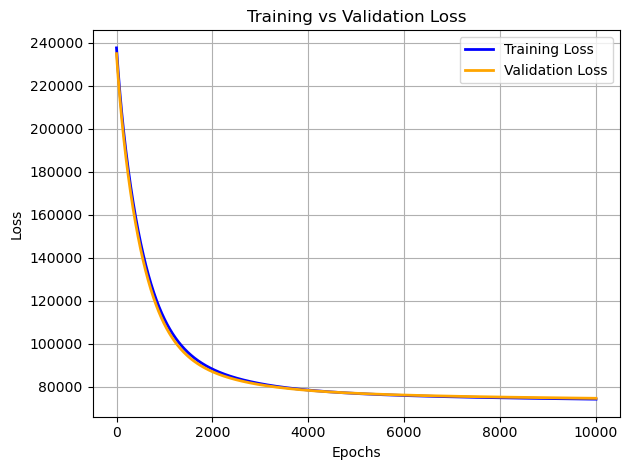

In [11]:
plt.plot(np.arange(len(loss)), np.array(loss, dtype=float), label='Training Loss', color='blue', linewidth=2)
plt.plot(np.arange(len(loss)), np.array(val_loss, dtype=float), label='Validation Loss', color='orange', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
y_pred=rg.predict_gd(x_test)

print(f"RMSE on test Dataset:{rg.rmse(y_pred,y_test):0.5f}")
print(f"MSE on test Dataset:{rg.mse(y_pred,y_test):0.5f}")
print(f"MAE on test Dataset:{rg.mae(y_pred,y_test):0.5f}")
print(f"R2 Score on test Dataset:{rg.r2_score(y_pred,y_test):0.5f}")

RMSE on test Dataset:74729.43185
MSE on test Dataset:5584487983.89764
MAE on test Dataset:54422.83147
R2 Score on test Dataset:0.56343


## Nomal Equation

In [14]:
rg.fit_normal(x_scaled,y)

array([  34086.98968773,  168325.29243718,   51618.9681595 ,
       -107524.53778027,  158001.78991112,    9711.99862972,
        -15549.76852254,  164948.0038656 ])

In [15]:
y_pred=rg.predict_normal(x_test)

In [16]:
y_pred=rg.predict_normal(x_test)

print(f"RMSE on test Dataset:{rg.rmse(y_pred,y_test):0.5f}")
print(f"MSE on test Dataset:{rg.mse(y_pred,y_test):0.5f}")
print(f"MAE on test Dataset:{rg.mae(y_pred,y_test):0.5f}")
print(f"R2 Score on test Dataset:{rg.r2_score(y_pred,y_test):0.5f}")

RMSE on test Dataset:172818.85451
MSE on test Dataset:29866356473.28661
MAE on test Dataset:140444.94143
R2 Score on test Dataset:-1.33481


In [17]:
print("Finished")

Finished
